In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

import pickle

In [ ]:
file_path = "C:\Users\Veera\Documents\ML_project\secondary_data.csv"
data = pd.read_csv(file_path)

In [ ]:
# Inspect the dataset
print("Dataset Head:")
print(data.head())
print("\nData Information:")
print(data.info())

Dataset Head:
  class  cap-diameter cap-shape cap-surface cap-color does-bruise-or-bleed  \
0     p         15.26         x           g         o                    f   
1     p         16.60         x           g         o                    f   
2     p         14.07         x           g         o                    f   
3     p         14.17         f           h         e                    f   
4     p         14.64         x           h         o                    f   

  gill-attachment gill-spacing gill-color  stem-height  ...  stem-root  \
0               e          NaN          w        16.95  ...          s   
1               e          NaN          w        17.99  ...          s   
2               e          NaN          w        17.80  ...          s   
3               e          NaN          w        15.77  ...          s   
4               e          NaN          w        16.53  ...          s   

  stem-surface stem-color veil-type veil-color has-ring ring-type  \
0  

In [ ]:
print("\nChecking for missing values:")
print(data.isnull().sum())



Checking for missing values:
class                       0
cap-diameter                0
cap-shape                   0
cap-surface             14120
cap-color                   0
does-bruise-or-bleed        0
gill-attachment          9884
gill-spacing            25063
gill-color                  0
stem-height                 0
stem-width                  0
stem-root               51538
stem-surface            38124
stem-color                  0
veil-type               57892
veil-color              53656
has-ring                    0
ring-type                2471
spore-print-color       54715
habitat                     0
season                      0
dtype: int64


In [ ]:
data.drop('veil-type',axis=1,inplace=True)
data.drop('spore-print-color',axis=1,inplace=True)

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan,strategy='most_frequent')
df=pd.DataFrame(data,columns=['cap-surface','gill-attachment','gill-spacing','stem-root','stem-surface','veil-color','ring-type'])
data[df.columns] = imputer.fit_transform(data[df.columns])

In [ ]:
for column in data.columns:
    if data[column].dtype == 'object':
        le = LabelEncoder()
        data[column] = le.fit_transform(data[column])

In [ ]:
data.describe()

class  cap-diameter     cap-shape   cap-surface     cap-color  \
count  61069.000000  61069.000000  61069.000000  61069.000000  61069.000000   
mean       0.554913      6.733854      4.041641      6.065025      6.144541   
std        0.496979      5.264845      2.138630      3.063499      3.171077   
min        0.000000      0.380000      0.000000      0.000000      0.000000   
25%        0.000000      3.480000      2.000000      3.000000      5.000000   
50%        1.000000      5.860000      5.000000      8.000000      5.000000   
75%        1.000000      8.540000      6.000000      8.000000     10.000000   
max        1.000000     62.340000      6.000000     10.000000     11.000000   

       does-bruise-or-bleed  gill-attachment  gill-spacing    gill-color  \
count          61069.000000     61069.000000  61069.000000  61069.000000   
mean               0.173410         2.109990      0.242775      7.338502   
std                0.378605         2.204614      0.547217      3.186426   
min                0.000000         0.000000      0.000000      0.000000   
25%                0.000000         0.000000      0.000000      5.000000   
50%                0.000000         1.000000      0.000000      7.000000   
75%                0.000000         4.000000      0.000000     10.000000   
max                1.000000         6.000000      2.000000     11.000000   

        stem-height    stem-width     stem-root  stem-surface    stem-color  \
count  61069.000000  61069.000000  61069.000000  61069.000000  61069.000000   
mean       6.581538     12.149410      0.323699      4.806629      8.429072   
std        3.370017     10.035955      1.008277      1.272054      3.218516   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        4.640000      5.210000      0.000000      5.000000      6.000000   
50%        5.950000     10.190000      0.000000      5.000000     11.000000   
75%        7.740000     16.570000      0.000000      5.000000     11.000000   
max       33.920000    103.910000      4.000000      7.000000     12.000000   

         veil-color      has-ring     ring-type       habitat        season  
count  61069.000000  61069.000000  61069.000000  61069.000000  61069.000000  
mean       3.956459      0.248555      1.449999      0.623721      1.053300  
std        0.382556      0.432179      1.468299      1.265880      1.100575  
min        0.000000      0.000000      0.000000      0.000000      0.000000  
25%        4.000000      0.000000      1.000000      0.000000      0.000000  
50%        4.000000      0.000000      1.000000      0.000000      1.000000  
75%        4.000000      0.000000      1.000000      1.000000      2.000000  
max        5.000000      1.000000      7.000000      7.000000      3.000000

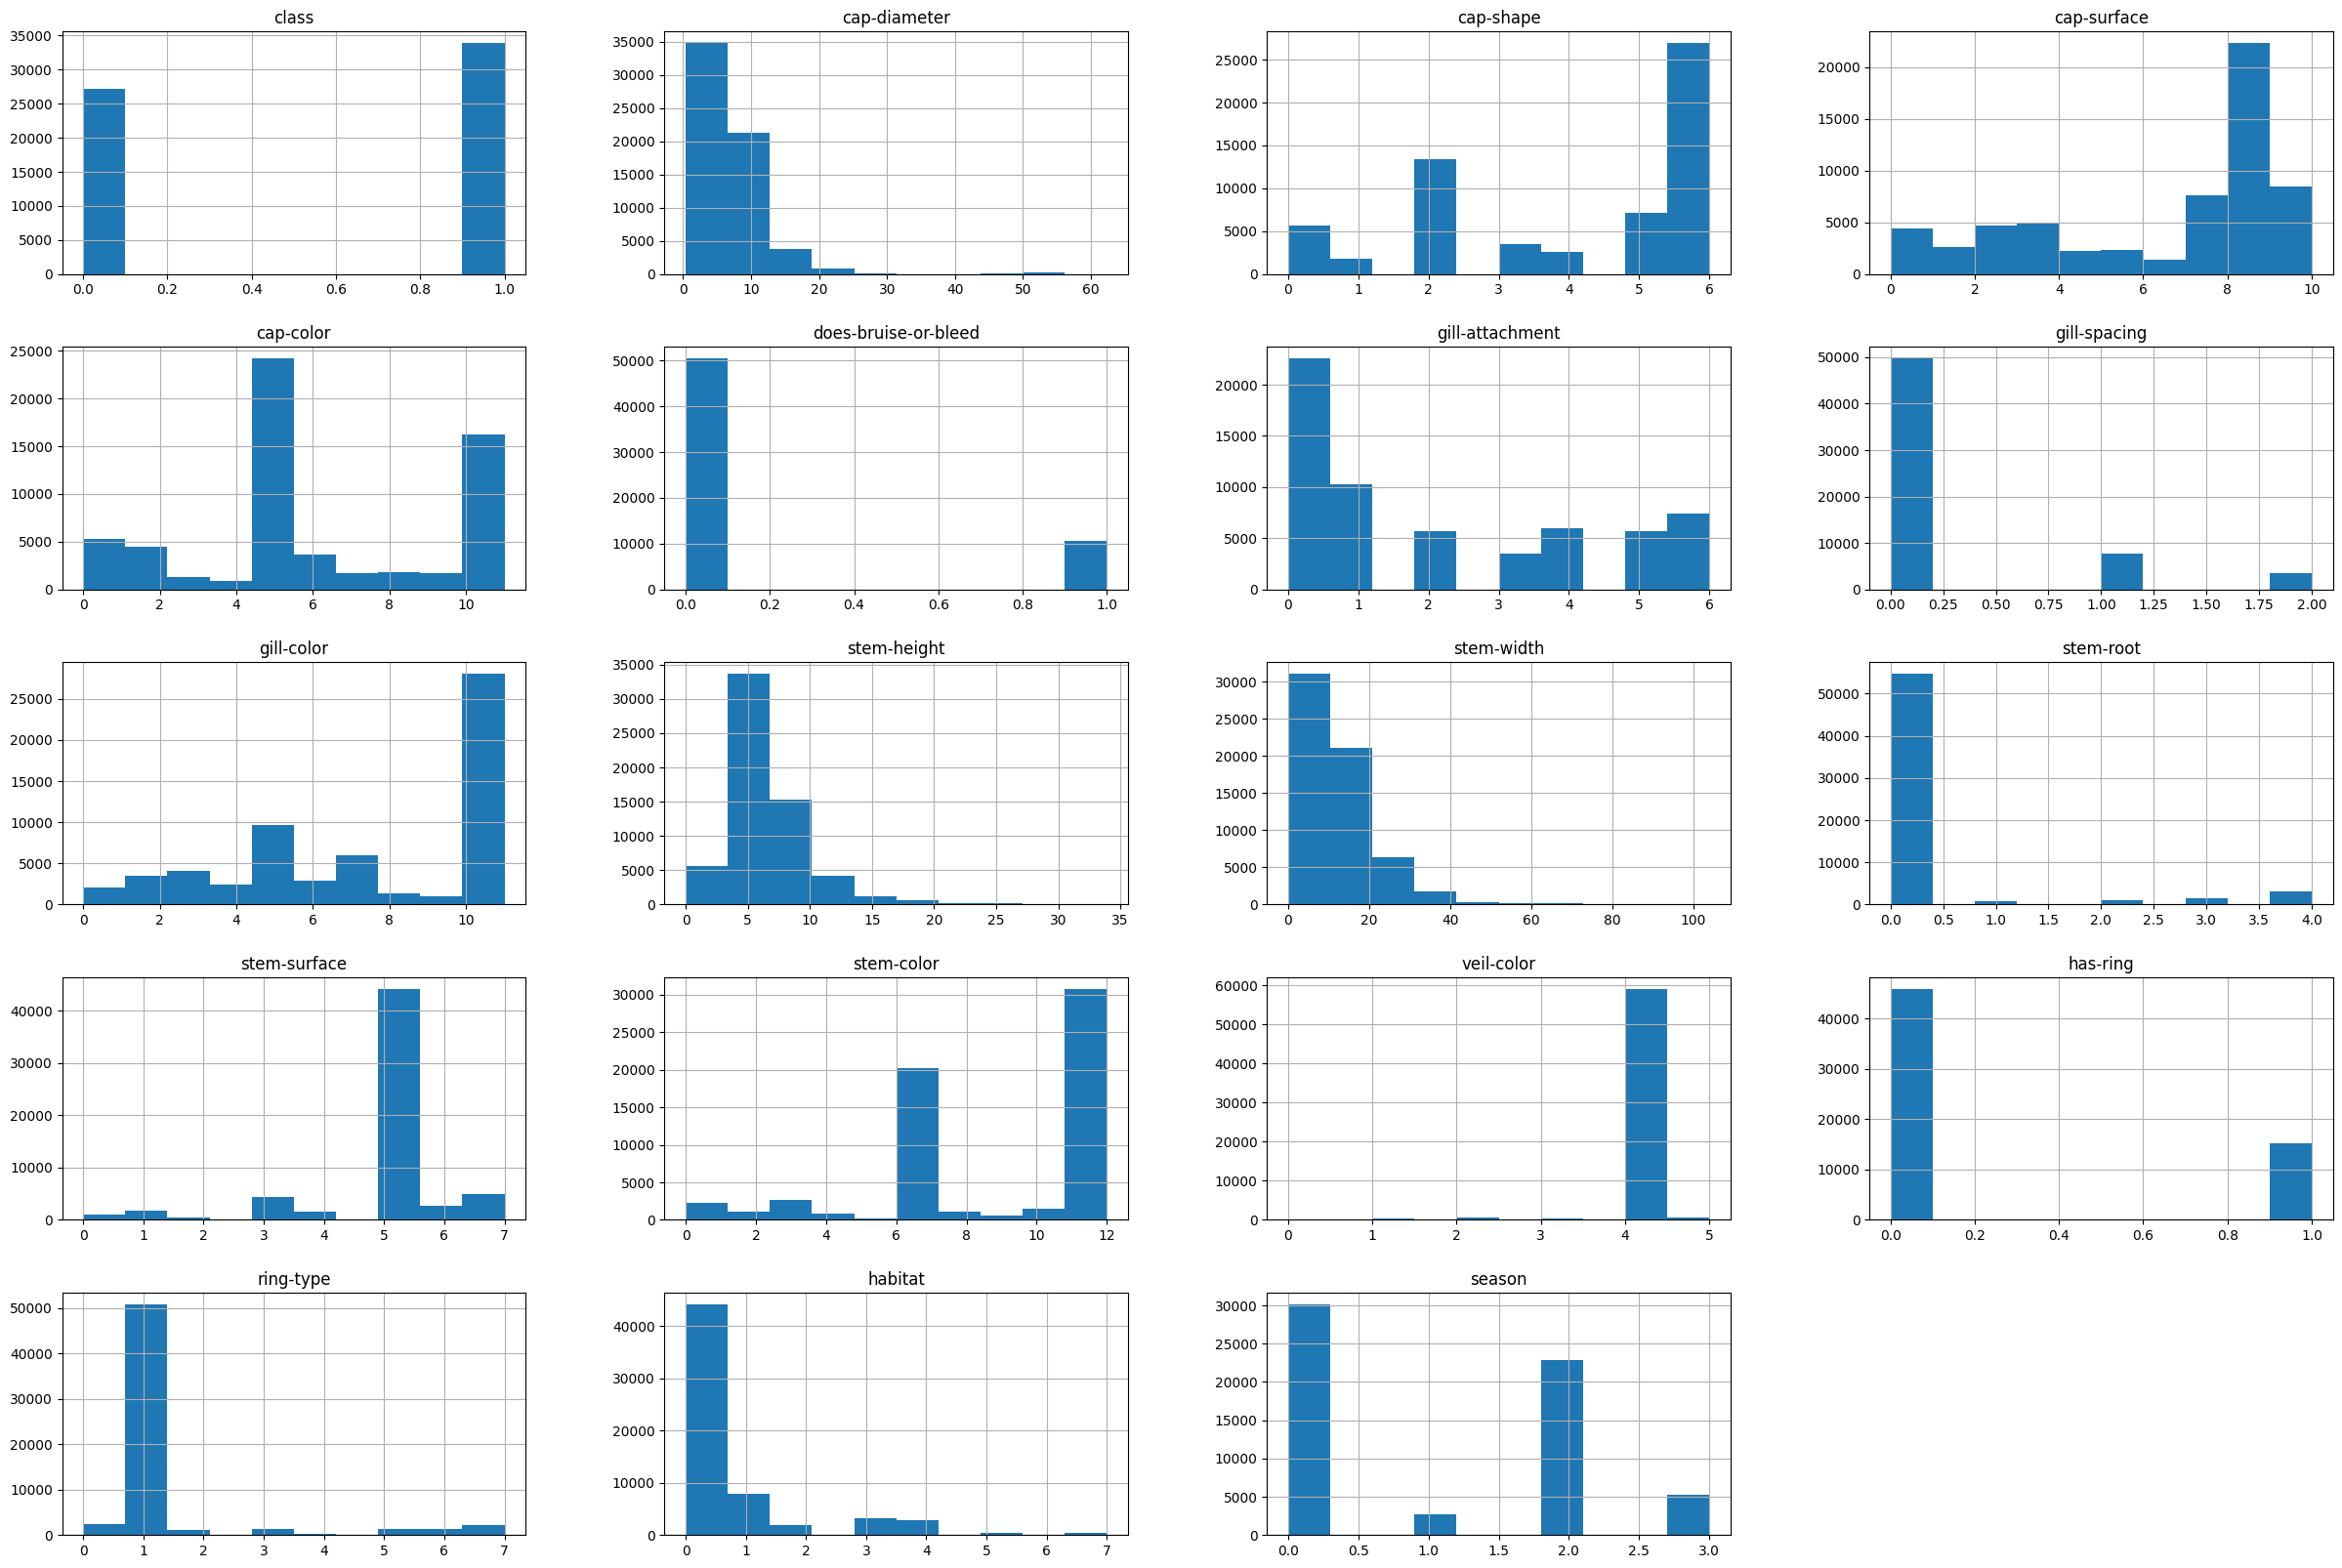

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
data.hist(figsize=(30, 20))
plt.show()

In [ ]:
data.drop(['veil-color'],axis=1,inplace=True)

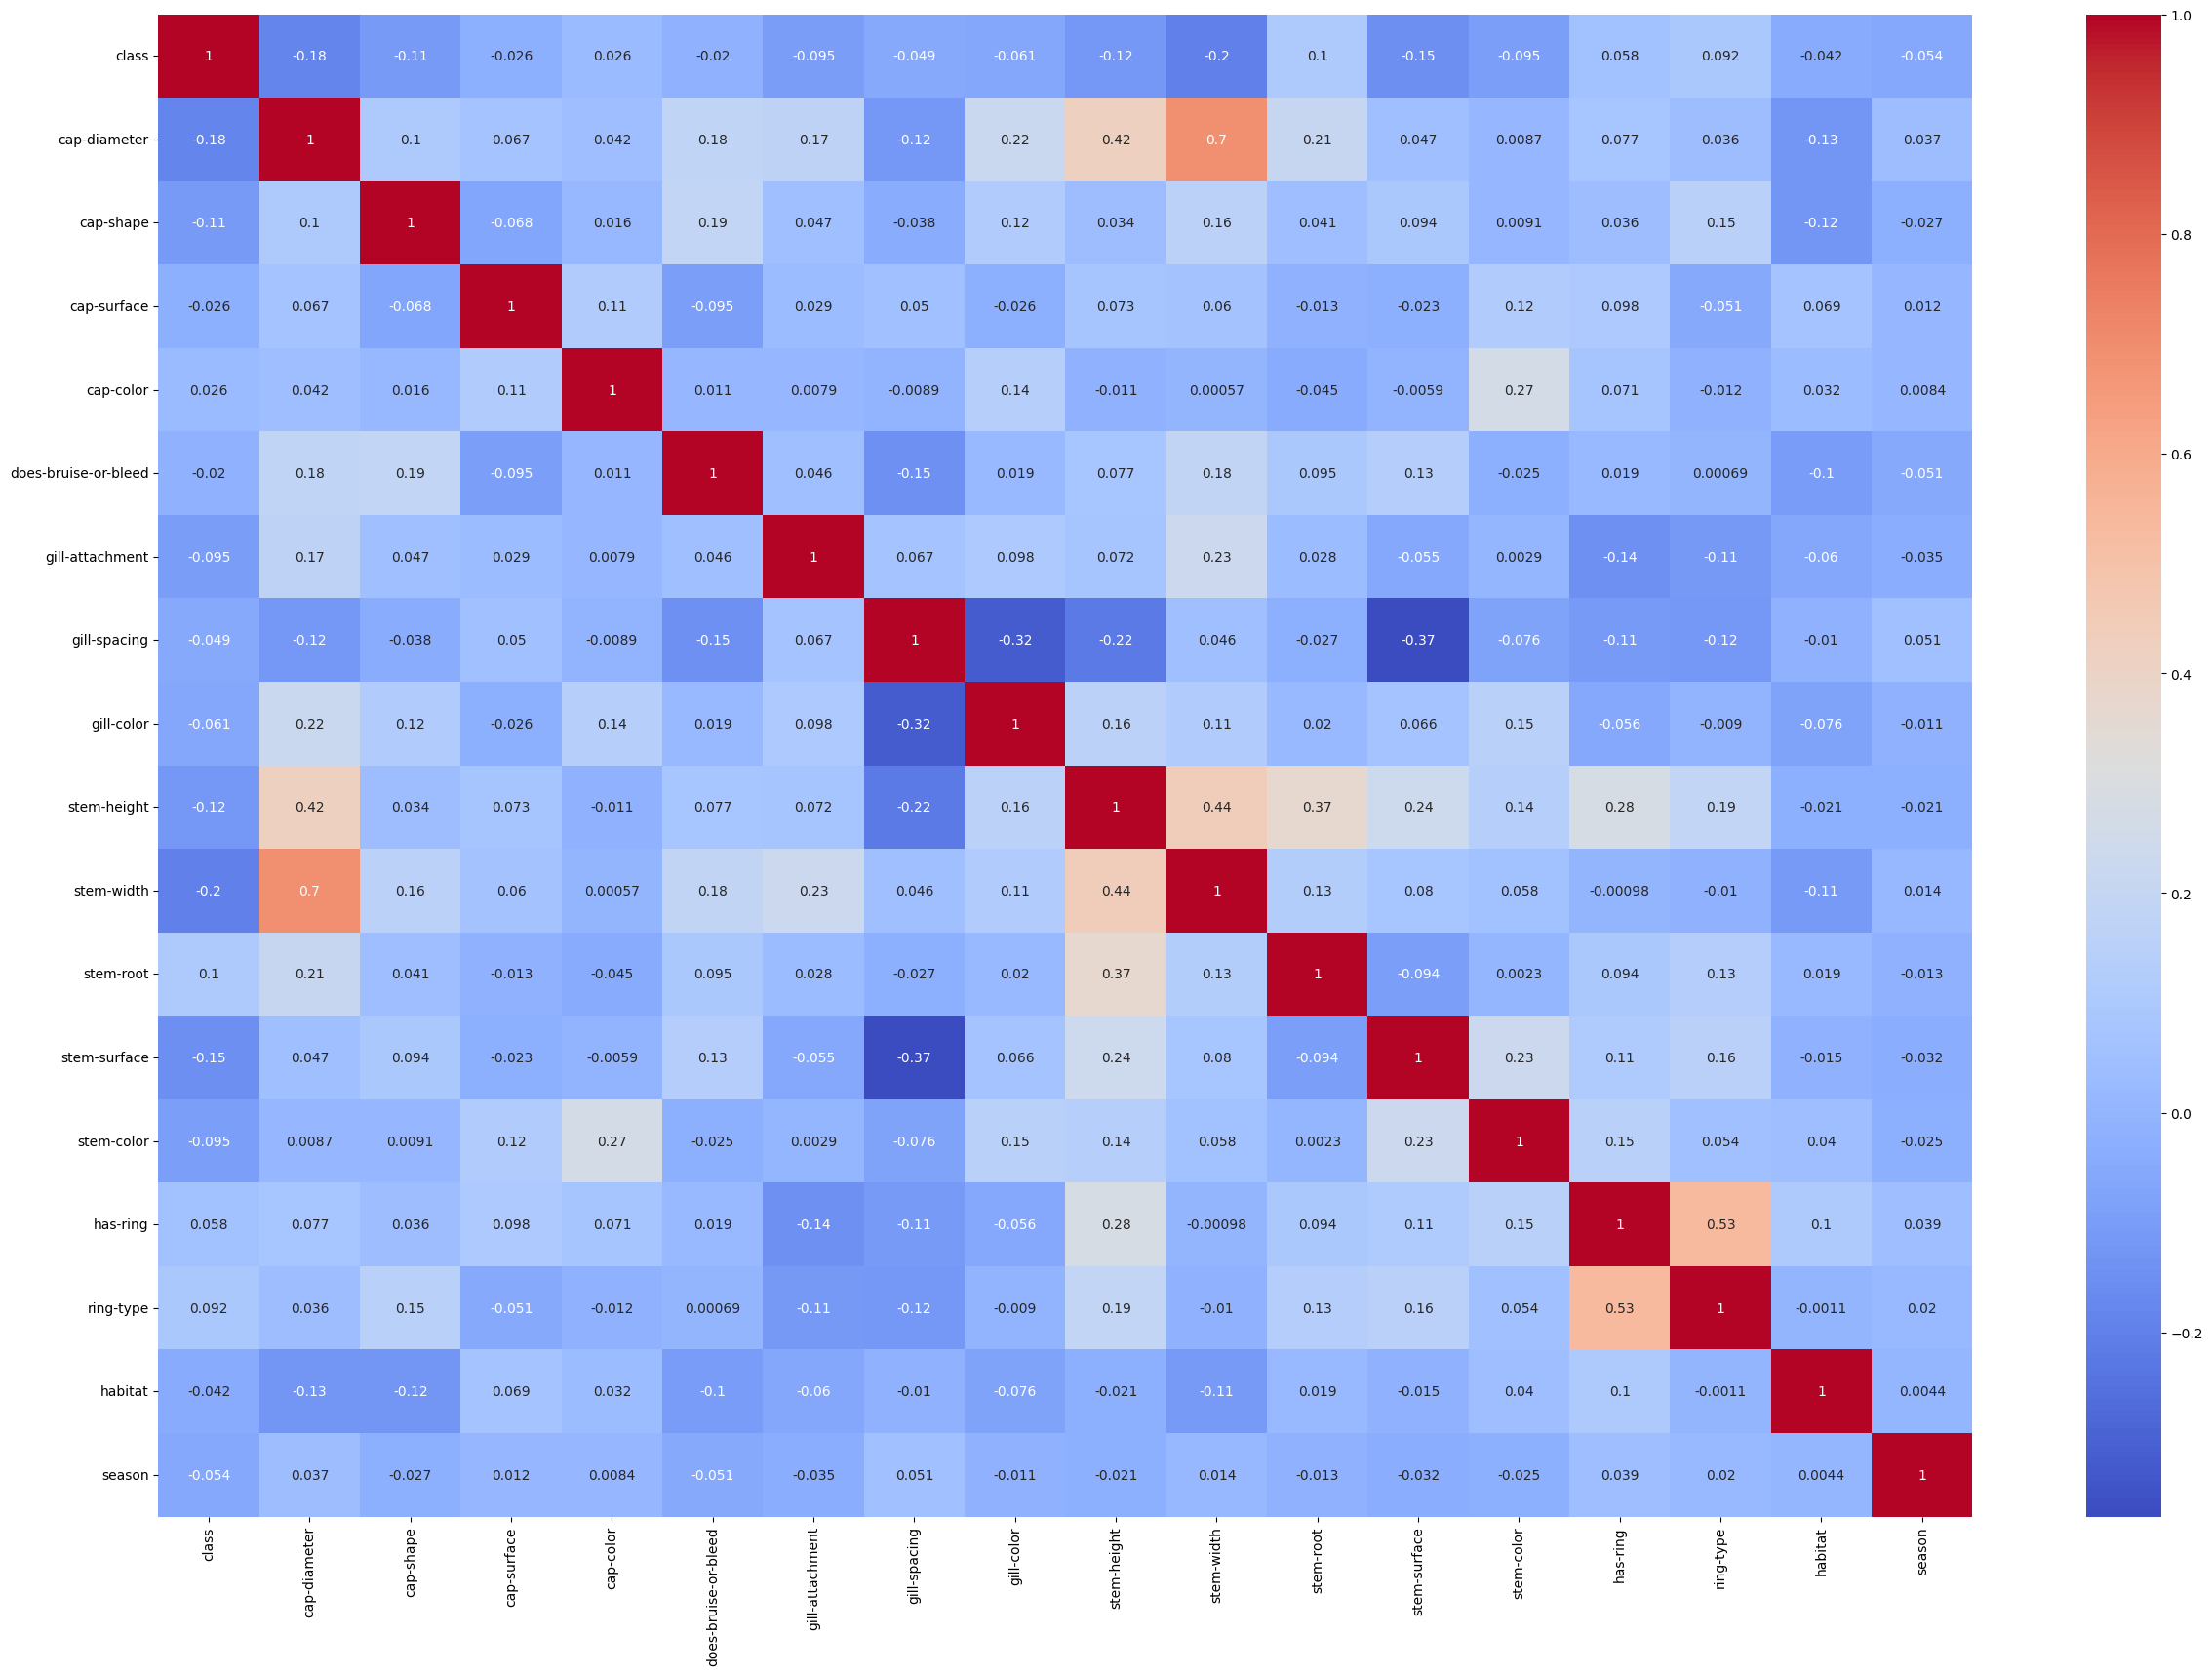

In [ ]:
data_corr=data.corr()
plt.figure(figsize=(30,20))
sns.heatmap(data_corr,annot=True,cmap='coolwarm')
plt.show()

In [ ]:
X=data.drop('class',axis=1)
y=data['class']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((48855, 17), (12214, 17), (48855,), (12214,))

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
rf_model = RandomForestClassifier(random_state=42)

In [ ]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = rf_model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy of the Random Forest Model:", accuracy)
print("\nClassification Report for Random Forest:")
print(classification_report(y_test, y_pred))


Accuracy of the Random Forest Model: 1.0

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5374
           1       1.00      1.00      1.00      6840

    accuracy                           1.00     12214
   macro avg       1.00      1.00      1.00     12214
weighted avg       1.00      1.00      1.00     12214



In [ ]:
from sklearn.metrics import f1_score,precision_score,recall_score
print("Precision of Random Forest:",precision_score(y_test, y_pred))
print("Recall of Random Forest:",recall_score(y_test, y_pred))
print("F1 score of Random Forest:",f1_score(y_test, y_pred))

Precision of Random Forest: 1.0
Recall of Random Forest: 1.0
F1 score of Random Forest: 1.0


In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print("Confusion Matrix for Random forest:",cm)

Confusion Matrix for Random forest: [[5374    0]
 [   0 6840]]


In [ ]:
from sklearn.metrics import roc_auc_score
y_probs = rf_model.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_probs)
print(f'AUC for Random Forest: {auc:.2f}')

AUC for Random Forest: 1.00


In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression(random_state=42,max_iter=1000)

In [ ]:
log_reg.fit(X_train,y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
y_pred_log = log_reg.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm_log=confusion_matrix(y_test,y_pred_log)
print("Confusion Matrix for Logistic Regression:",cm_log)

Confusion Matrix for Logistic Regression: [[2870 2504]
 [1698 5142]]


In [ ]:
accuracy = accuracy_score(y_test, y_pred_log)
print("\nAccuracy of the Logistic Regression:", accuracy)
print("\nClassification Report for Logistic Regression:")
print(classification_report(y_test, y_pred_log))


Accuracy of the Logistic Regression: 0.6559685606680858

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.63      0.53      0.58      5374
           1       0.67      0.75      0.71      6840

    accuracy                           0.66     12214
   macro avg       0.65      0.64      0.64     12214
weighted avg       0.65      0.66      0.65     12214



In [ ]:
print("Precision for Logistic Regression:",precision_score(y_test, y_pred_log))
print("Recall for Logistic Regression:",recall_score(y_test, y_pred_log))
print("F1 score of Logistic Regression:",f1_score(y_test, y_pred_log))

Precision for Logistic Regression: 0.672508501177086
Recall for Logistic Regression: 0.7517543859649123
F1 score of Logistic Regression: 0.7099268259008698


In [ ]:
y_proba_log=log_reg.predict_proba(X_test)[:,1]
auc=roc_auc_score(y_test,y_proba_log)
print(f'AUC for Logistic Regression : {auc:.2f}')

AUC for Logistic Regression : 0.72


In [ ]:
from sklearn.naive_bayes import GaussianNB
nb_model=GaussianNB()

In [ ]:
nb_model.fit(X_train,y_train)

GaussianNB()

In [ ]:
y_pred_nb=nb_model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred_nb)
print("\nAccuracy of the Gaussian NB:", accuracy)
print("\nClassification Report of Gaussian NB:")
print(classification_report(y_test, y_pred_nb))


Accuracy of the Gaussian NB: 0.6209268053053872

Classification Report of Gaussian NB:
              precision    recall  f1-score   support

           0       0.56      0.69      0.62      5374
           1       0.70      0.57      0.63      6840

    accuracy                           0.62     12214
   macro avg       0.63      0.63      0.62     12214
weighted avg       0.64      0.62      0.62     12214



In [ ]:
from sklearn.metrics import confusion_matrix
cm_nb=confusion_matrix(y_test,y_pred_nb)
print("Confusion Matrix for Gaussian NB:",cm_nb)

Confusion Matrix for Gaussian NB: [[3705 1669]
 [2961 3879]]


In [ ]:
y_proba_nb=nb_model.predict_proba(X_test)[:,1]
auc=roc_auc_score(y_test,y_proba_nb)
print(f'AUC for Gaussian NB: {auc:.2f}')

AUC for Gaussian NB: 0.69


In [ ]:
from sklearn.metrics import f1_score,precision_score,recall_score
print("Precision for Gaussian NB:",precision_score(y_test, y_pred_nb))
print("Recall for Gaussian NB:",recall_score(y_test, y_pred_nb))
print("F1 score for Gaussian NB:",f1_score(y_test, y_pred_nb))

Precision for Gaussian NB: 0.6991708723864456
Recall for Gaussian NB: 0.5671052631578948
F1 score for Gaussian NB: 0.6262512108492089


In [ ]:
# dump your model into a pickle file
pickle.dump(rf_model, open('model.pkl', 'wb'))